# Pokemon - Проект по МОПР №3


## Data Preprocessing - (правим ChatGPT)

Имаме следните колони: name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed

_лек disclamer - някои задачи са разменени, просто защото има повече логика да са в реда, който са правени тук._

За които трябва да направим следните неща:


In [82]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [93]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

NUMBER_OF_COLS = 11
FILENAME = 'input.csv'

# Read the csv file and keep None values
df = pd.read_csv(FILENAME, keep_default_na=False, na_values=[""])

# print read data
df


,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


### Задача 5: Премахване на празни данни (0.2 точки)

В някои случаи провеждащите проучването лица оставят отговарящите да не попълнят някои въпроси и това оставя празни места. Тези празни места могат да попречат на проучването ни. Елиминирайте всички редове, които имат празни места в някоя колона. ВНИМАНИЕ: NONE НЕ Е ЗНАК ЗА ПРАЗНА КОЛОНА.


In [94]:
# Remove rows with any empty cells
df.dropna(how='any', inplace=True)

# print modified data
df


,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


### Задача 3: Стандартизиране на главни и малки букви (0.2 точки)

За да не оставите програмата да класифицира МЕСО и месо като различни продукти, важно е да стандартизирате формата на текста. Стандартизирайте категорийните променливи в избран от вас формат.


In [95]:
# Standardize the data - make all strings lowercase
df = df.apply(lambda x: x.astype(str).str.lower())


### Задача 4: Превод на данните (0.2 точки)

Понякога ни се налага да правим превод от един език на друг. В dataset-a ще видите, че някои имена на покемони са на чужд език. Преведете ги на английски, използвайки някой известен ресурс за покемони (например bulbapedia).

In [96]:
# ### Задача 4: Превод на данните (0.2 точки)
# Понякога ни се налага да правим превод от един език на друг. В dataset-a ще видите, че някои имена на покемони са на чужд език. Преведете ги на английски, използвайки някой известен ресурс за покемони(например bulbapedia).

# get pokemon names for csv [English, German, French] - scraped from https://www.pokewiki.de/Pokémon-Liste
# 0 -> English
# 1 -> German
# 2 -> French

import csv 
import difflib

poke_names = []

with open('poke.csv', 'r', encoding='utf-8') as f:
    # skip header
    next(f)
    reader = csv.reader(f)
    poke_names = list(reader)

# to lower case
for i in range(len(poke_names)):
    for j in range(len(poke_names[i])):
        poke_names[i][j] = poke_names[i][j].lower()

# check all names from df if they are in poke_names[i][0]
# if they arent -> print them
not_in_poke_names = []

for name in df['name']:
    found = False
    for i in range(len(poke_names)):
        for j in range(len(poke_names[i])):
            if name == poke_names[i][j]:
                found = True
                break
        if found:
            break
        for j in range(len(poke_names[i])):
            # get everything before - we do this, because after a 'deep' investigation, i found out, that some of the names inluce the type of a pokemon after the '-'
            # TODO: Add japanese (latin)
            # check if they start with mr or tapu or hame -jr

            # if it contains é or any other special character - convert it to normal character
            poke_names[i][j] = poke_names[i][j].replace('é', 'e')

            if name.endswith('-m'): 
                # replace with symbol
                name2 = name.replace('-m', '♂')
            elif name.endswith('-f'):
                name2 = name.replace('-f', '♀')

            if name.startswith('mr') or name.startswith('tapu') or name.endswith('jr') or name.endswith('oh'):
                name2 = name
            else:
                name2 = name.split('-')[0]

            # fuzzy string match with levenstein distance with difflib
            # todo - preserve -type if its in english
            if difflib.SequenceMatcher(None, name2.lower(), poke_names[i][j]).ratio() > 0.75:
                found = True
                # replace name with correct english name
                print('replacing', name, 'with', poke_names[i][0])
                df['name'] = df['name'].replace(name, poke_names[i][0])
                break
        if found:
            break
    if not found:
        not_in_poke_names.append(name)
        # remove from df
        df = df[df['name'] != name]

# len(not_in_poke_names)
not_in_poke_names

# df
        


replacing pidgeot with pidgey
replacing fearow with spearow
replacing nidoran-f with nidoran♀
replacing nidoran-m with nidoran♀
replacing nidorino with nidorina
replacing wigglytuff with jigglypuff
replacing parasect with paras
replacing machoke with machop
replacing machamp with machop
replacing magneton with magnemite
replacing farfetchd with farfetch’d
replacing exeggutor with exeggcute
replacing rhydon with rhyhorn
replacing starmie with staryu
replacing mr-mime with mr. mime
replacing tauros with pidgeot
replacing kabutops with kabuto
replacing dragonite with dragonair
replacing ariados with gyarados
replacing pichu with pikachu
replacing igglybuff with jigglypuff
replacing togetic with togepi
replacing azumarill with marill
replacing mantine with dewgong
replacing porygon2 with porygon
replacing grovyle with golem
replacing slaking with seaking
replacing azurill with marill
replacing lairon with flareon
replacing aggron with swampert
replacing electrike with electrode
replacing v

['fushigisou', 'snake', 'jesusmon', 'simight', 'tapu-mie']

### Задача 2: Премахване на технически грешки в данните (0.2 точки)

Ако знаете, че Гошо яде или мусака, или сарми за обяд, как ще реагирате, когато вашата програма ви покаже, че той яде и мосака, и сърнди? Очевидно това са правописни грешки. Във файла, pokemon_stats.csv, ще видите, че типовете на покемоните имат някои грешки. Задачата е да ги поправите. Ако не сте запознати с типовете на покемоните, използвайте Гугъл.


In [97]:
# Задача 2: Премахване на технически грешки в данните (0.2 точки)
# Ако знаете, че Гошо яде или мусака, или сарми за обяд, как ще реагирате, когато вашата програма ви покаже, че той яде и мосака, и сърнди? Очевидно това са правописни грешки. Във файла, pokemon_stats.csv, ще видите, че типовете на покемоните имат някои грешки. Задачата е да ги поправите. Ако не сте запознати с типовете на покемоните, използвайте Гугъл.

# Correct Pokemon types
CORRECT_TYPES = [
    "Normal",
    "Fire",
    "Fighting",
    "Water",
    "Flying",
    "Grass",
    "Poison",
    "Electric",
    "Ground",
    "Psychic",
    "Rock",
    "Ice",
    "Bug",
    "Dragon",
    "Ghost",
    "Dark",
    "Steel",
    "Fairy",
    "???",
    "None"  # none is also correct, since you can use it for the second type
]

# make all types lowercase
CORRECT_TYPES = [x.lower() for x in CORRECT_TYPES]

# print the rows with incorrect types
print("===================\nIncorrect types:")
print(df[~df['type'].isin(CORRECT_TYPES)])
print("===================\nIncorrect secundary types:")
print(df[~df['secundary type'].isin(CORRECT_TYPES)])


Incorrect types:
Empty DataFrame
Columns: [name, height, weight, type, secundary type, hp, attack, defense, sp atk, sp def, speed]
Index: []
Incorrect secundary types:
Empty DataFrame
Columns: [name, height, weight, type, secundary type, hp, attack, defense, sp atk, sp def, speed]
Index: []


### Задача 1: Премахване на дублирани данни (0.2 точки)

Какво ще стане, ако запишем, че Гошо е ял мусака в 12:20 3 пъти? Ще направим грешно заключение, че Гошо яде много мусака. За да избегнем това, трябва да изчистим дублираните данни. Вашата задача е да изчистите файла pokemon_stats.csv от дублирани данни и да предоставите кода, чрез който сте го направили.


In [88]:
# Remove duplicates - on name column (only thing that can be duplicated)
df.drop_duplicates(subset=['name'], inplace=True)

# print modified data
df


,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,none,39.0,52.0,43.0,60.0,50.0,65.0
5,charmeleon,11.0,190.0,fire,none,58.0,64.0,58.0,80.0,65.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,none,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,none,92.0,130.0,115.0,80.0,115.0,138.0


## 2

### Задача 8: В една игра обикновено има starter pokemon-и, които са от тип Fire, Grass или Water. Нека да предположим, че всеки покемон от тези типове може да е starter (дори и еволюциите). Какъв е шансът, ако изберем Water, той да е и Poison? (0.35 точки)

Задачата решаваме чрез класическа вероятност. Ако не сте запознати какво е това, моля, потърсете информация в Интернет.

In [98]:
# Задача 8: В една игра обикновено има starter pokemon-и, които са от тип Fire, Grass или Water. Нека да предположим, че всеки покемон от тези типове може да е starter (дори и еволюциите). Какъв е шансът, ако изберем Water, той да е и Poison? (0.35 точки)
# Задачата решаваме чрез класическа вероятност. Ако не сте запознати какво е това, моля, потърсете информация в Интернет.

# get all water pokemon
water_pokemon = df[df['type'] == 'water']
# get all water pokemon that are also poison
water_pokemon_poison = water_pokemon[water_pokemon['secundary type'] == 'poison']

# get the probability
print('Probability of a water pokemon to be poison is:', len(water_pokemon_poison) / len(water_pokemon))


Probability of a water pokemon to be poison is: 0.024390243902439025


### Задача 10: Направете хистограма на вторичните типове. Кой е най-често срещаният вторичен тип? (0.35 точки)

Most common secundary type is: flying


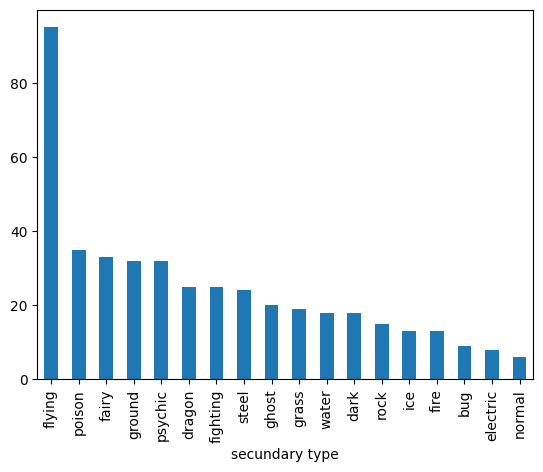

In [102]:
# ### Задача 10: Направете хистограма на вторичните типове. Кой е най-често срещаният вторичен тип? (0.35 точки)

# get all secundary types skip none
secundary_types = df['secundary type'].value_counts()[1:] # skip none

# plot the histogram, not a bar chart
secundary_types.plot(kind='bar')

# get the most common secundary type
print('Most common secundary type is:', secundary_types.index[0])

## 3

### Задача 10: Какво е средноаритметичното на атаката на покемоните? (0.1 точки)

In [116]:
# Задача 10: Какво е средноаритметичното на атаката на покемоните? (0.1 точки)

# check if there are any null values
df['attack'].isnull().values.any()

# check if there are no numeric values
# df['attack'].str.isnumeric().values.all()

# convert to numeric
df['attack'] = pd.to_numeric(df['attack'])

# get the mean
print('Mean attack is:', df['attack'].mean())


Mean attack is: 76.28170594837262


### Задача 11: Покажете таблица на средноаритметичните на всички числови променливи. (0.2 точки)

In [117]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


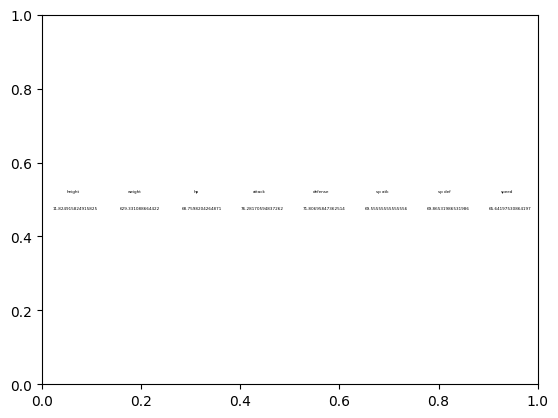

height      11.824916
weight     629.331089
hp          68.759820
attack      76.281706
defense     71.806958
sp atk      69.555556
sp def      69.865320
speed       65.641975
dtype: float64


In [124]:
# Задача 11: Покажете таблица на средноаритметичните на всички числови променливи. (0.2 точки)

# print table with mean of all numeric columns

import numpy as np


# name	height	weight	type	secundary type	hp	attack	defense	sp atk	sp def speed
# bulbasaur	7.0	69.0	grass	poison	45.0	49.0	49.0	65.0	65.0	45.0

# get all numeric columns - height, weight, hp, attack, defense, sp atk, sp def, speed
numeric_columns = df[['height', 'weight', 'hp', 'attack', 'defense', 'sp atk', 'sp def', 'speed']]
# convert to numeric
numeric_columns = numeric_columns.apply(pd.to_numeric)
# get the mean for each column
numeric_columns = numeric_columns.mean()
# create a table with matplotlib
table = plt.table(cellText=[numeric_columns], colLabels=numeric_columns.index, loc='center')
# hide the axes
ax = plt.gca()
# hide the borders
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)
# show the table
plt.show()

# print the table
print(numeric_columns)


### Задача 12: Съвпада ли модата със средноаритметичното при всички числови променливи? (0.3 точки)


In [142]:
# ### Задача 12: Съвпада ли модата със средноаритметичното при всички числови променливи? (0.3 точки)

# get the mode for each column
numeric_columns2 = df[['height', 'weight', 'hp',
                      'attack', 'defense', 'sp atk', 'sp def', 'speed']]
numeric_columns2 = numeric_columns2.apply(pd.to_numeric)

# print(numeric_columns2)

mean = numeric_columns2.mean()


# for each column get the mode
mode = numeric_columns2.mode().iloc[0]


print('Mean:')
print(mean)
print('Mode:')
print(mode)

# check if the mode is equal to the mean
print(mode.equals(mean))


Mean:
height      11.824916
weight     629.331089
hp          68.759820
attack      76.281706
defense     71.806958
sp atk      69.555556
sp def      69.865320
speed       65.641975
dtype: float64
Mode:
height      6.0
weight     10.0
hp         60.0
attack     60.0
defense    50.0
sp atk     40.0
sp def     50.0
speed      50.0
Name: 0, dtype: float64
False


Mean height is: 17.42105263157895


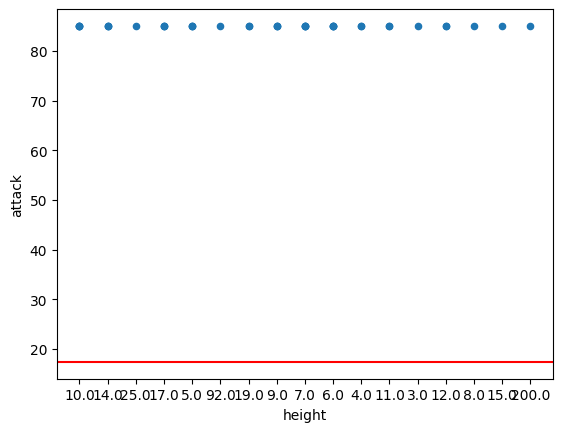

In [130]:
# Задача 13: Предвидете колко висок би бил един покемон, ако има 85 атака. (0.5 точки)

# get all pokemon with 85 attack
pokemon_85_attack = df[
    pd.to_numeric(df['attack']) == 85]

# plot the height and attack
pokemon_85_attack.plot(x='height', y='attack', kind='scatter')

# get the mean height
mean_height = pd.to_numeric(pokemon_85_attack['height']).mean()

# print the mean height
print('Mean height is:', mean_height)

# plot the mean height
plt.axhline(mean_height, color='red')

# show the plot
plt.show()

In [135]:
# Задача 13: Предвидете колко висок би бил един покемон, ако има 85 атака. (0.5 точки)

# use linear regression to predict the height - from  scratch

# get all pokemon with 85 attack
pokemon_85_attack = df[
    pd.to_numeric(df['attack']) == 85]

# print(pokemon_85_attack)

# get the height and attack
height = pd.to_numeric(pokemon_85_attack['height'])

print(height)

attack = pd.to_numeric(pokemon_85_attack['attack'])

# get the mean height
mean_height = height.mean()

# get the mean attack
mean_attack = attack.mean()

# get the difference between the height and the mean height
height_diff = height - mean_height

# get the difference between the attack and the mean attack
attack_diff = attack - mean_attack

# get the product of the differences
product = height_diff * attack_diff

# get the squared difference of the height
height_diff_squared = height_diff ** 2

# get the sum of the squared differences
height_diff_squared_sum = height_diff_squared.sum()

# get the slope
slope = product.sum() / height_diff_squared_sum

# get the intercept
intercept = mean_attack - slope * mean_height

# get the predicted height
predicted_height = slope * 85 + intercept

# print the predicted height
print('Predicted height is:', predicted_height)


80      10.0
88      14.0
115     10.0
135     25.0
148     17.0
199     14.0
202      5.0
212     92.0
247     19.0
259     17.0
261      9.0
264      7.0
283      7.0
309      6.0
330      5.0
337      4.0
406     10.0
408     10.0
410      9.0
452      6.0
469     17.0
512     11.0
536      3.0
598      6.0
610     12.0
626      9.0
631      5.0
641     14.0
643     11.0
733      7.0
739      6.0
793     12.0
819      7.0
826     19.0
850      4.0
853      8.0
874     15.0
898    200.0
Name: height, dtype: float64
Predicted height is: 85.0
